**Punto 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

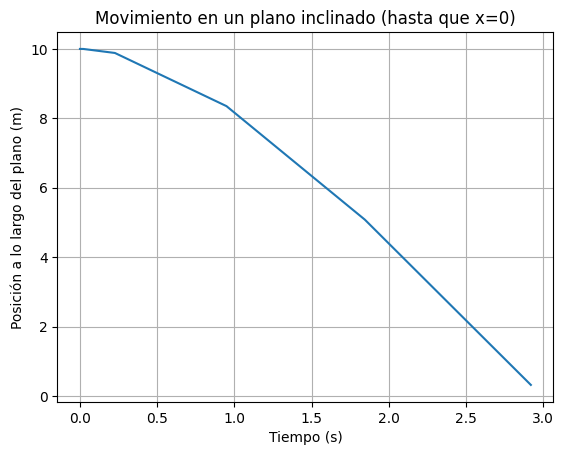

El objeto llega al final del plano en t = 4.170432877671682 segundos


In [2]:
# Parámetros físicos
m = 1  # Masa del objeto (kg)
g = 9.81  # Aceleración de la gravedad (m/s^2)
theta = np.pi/6  # Ángulo de inclinación (30 grados)
H = 10  # Altura inicial (m)

# Función del modelo
def model(t, y, g, theta,m):
    x, v = y
    dxdt = v
    dvdt = -g*np.sin(theta)-v/m
    return [dxdt, dvdt]

# Condiciones iniciales
y0 = [H, 0]  # Posición inicial (H en el eje x) y velocidad inicial (0)
t_span = (0, 10)  # Intervalo de tiempo

# Resolver la ecuación diferencial
sol = solve_ivp(model, t_span, y0, args=(g, theta,m))

# Extraer la posición y velocidad en función del tiempo
t = sol.t
x = sol.y[0]

# Encontrar el índice donde x se hace negativo (cruza el cero)
zero_index = np.where(x < 0)[0][0]

# Cortar los arrays t y x para graficar solo hasta el cero
t_plot = t[:zero_index]
x_plot = x[:zero_index]

# Graficar la posición en función del tiempo
plt.plot(t_plot, x_plot)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición a lo largo del plano (m)')
plt.title('Movimiento en un plano inclinado (hasta que x=0)')
plt.grid(True)
plt.show()

# Interpolación para obtener el tiempo exacto en el cero
t_zero = np.interp(0, x[:zero_index+1], t[:zero_index+1])
print("El objeto llega al final del plano en t =", t_zero, "segundos")

#

**Punto 3**

Energías permitidas (forma simétrica): [np.float64(0.5), np.float64(2.5), np.float64(4.5), np.float64(6.5), np.float64(8.5)]
Energías permitidas (forma antisimétrica): [np.float64(1.5), np.float64(3.5), np.float64(5.5), np.float64(7.5), np.float64(9.5)]


Exception ignored in: <function tqdm.__del__ at 0x000002223E6F2F20>
Traceback (most recent call last):
  File "c:\Users\PEPE\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\PEPE\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


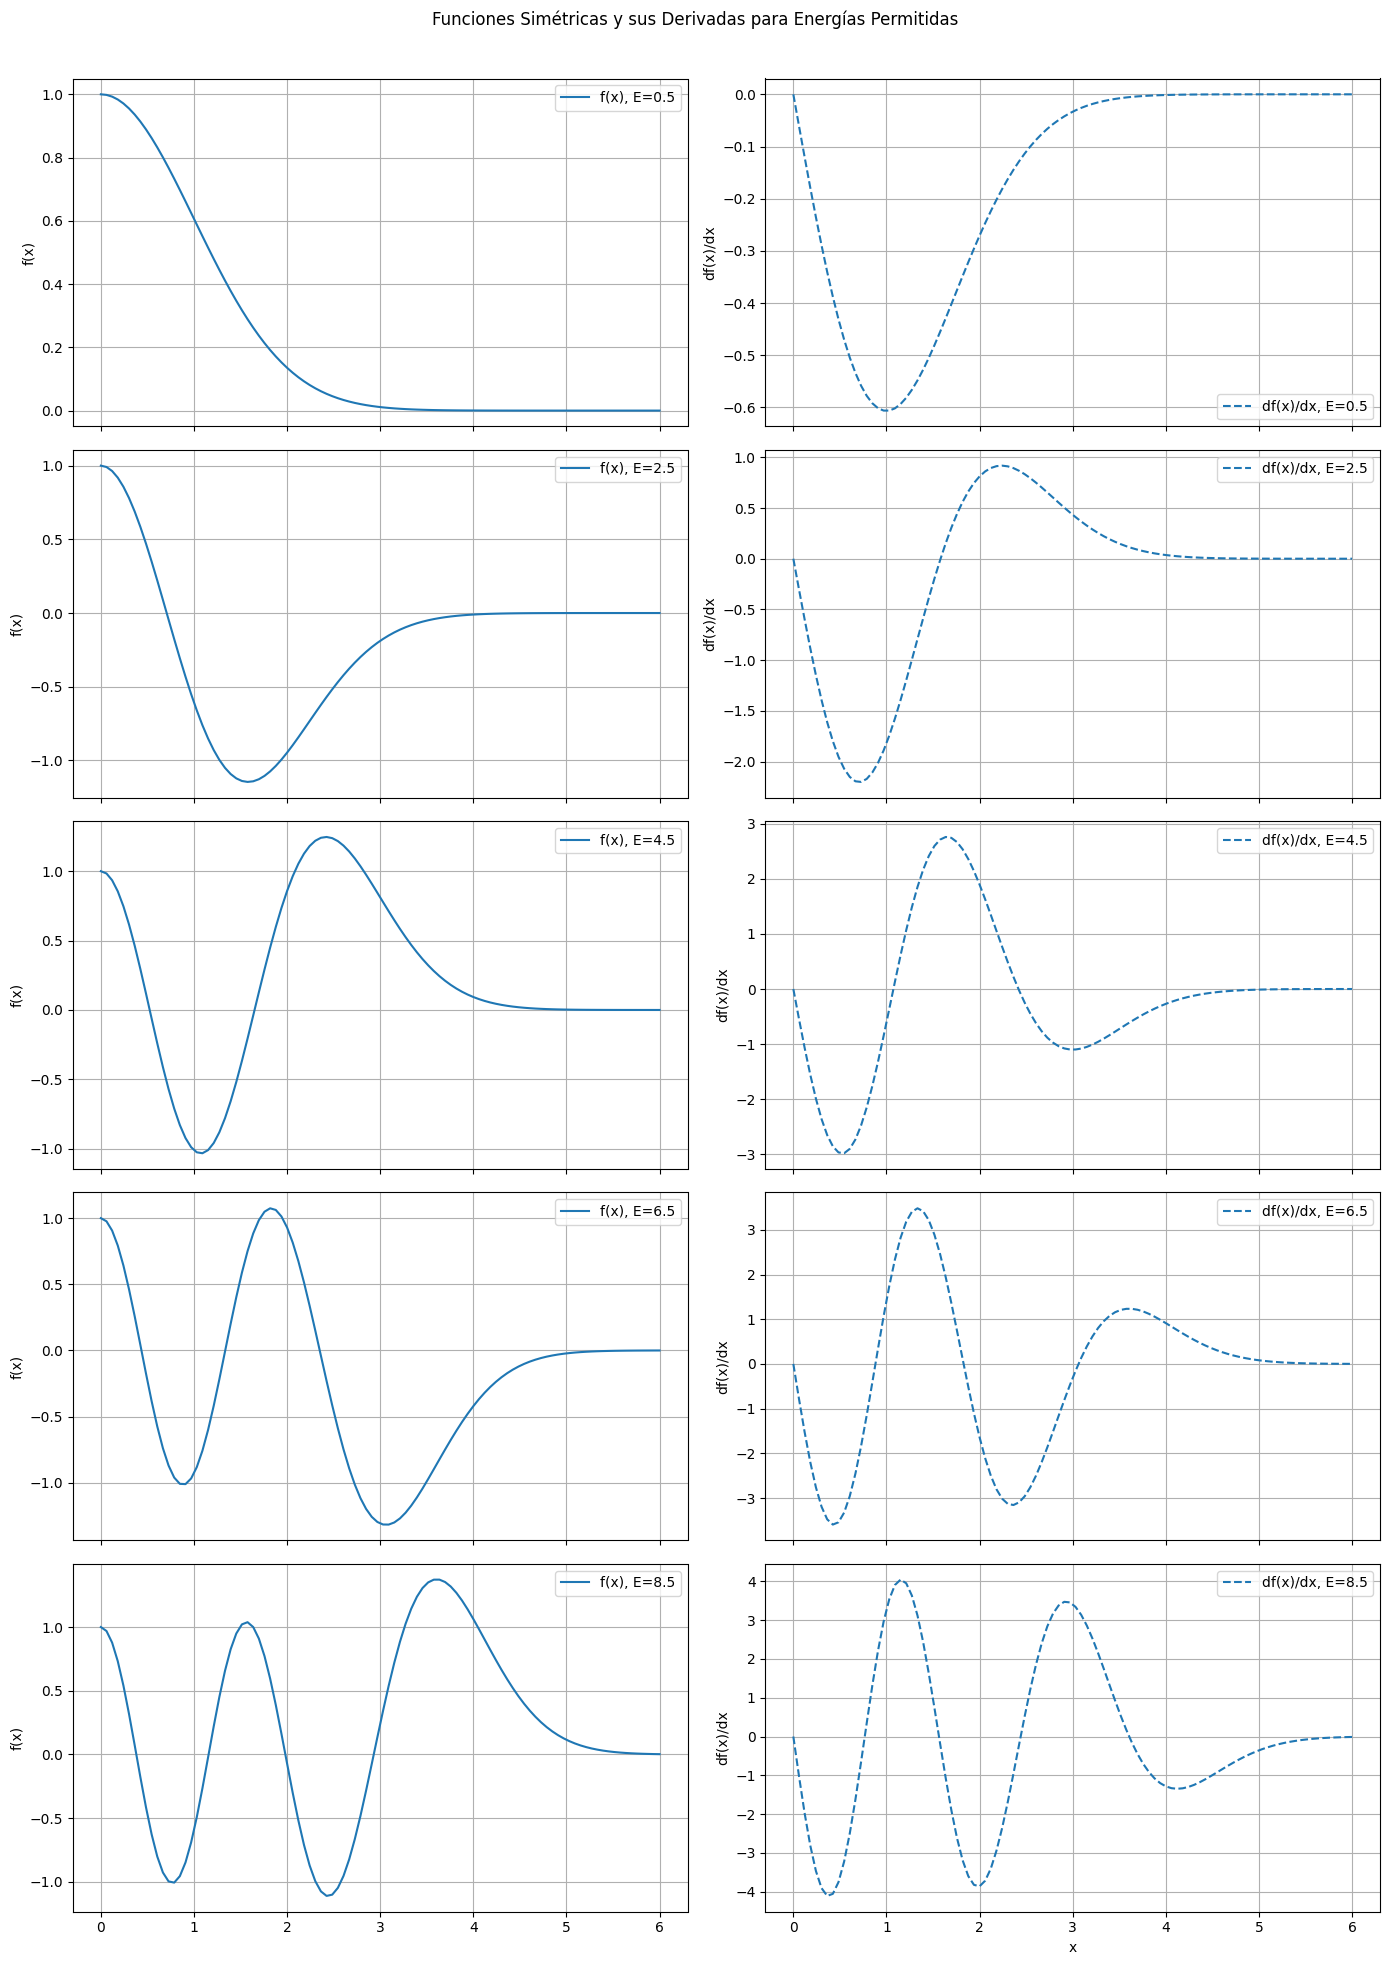

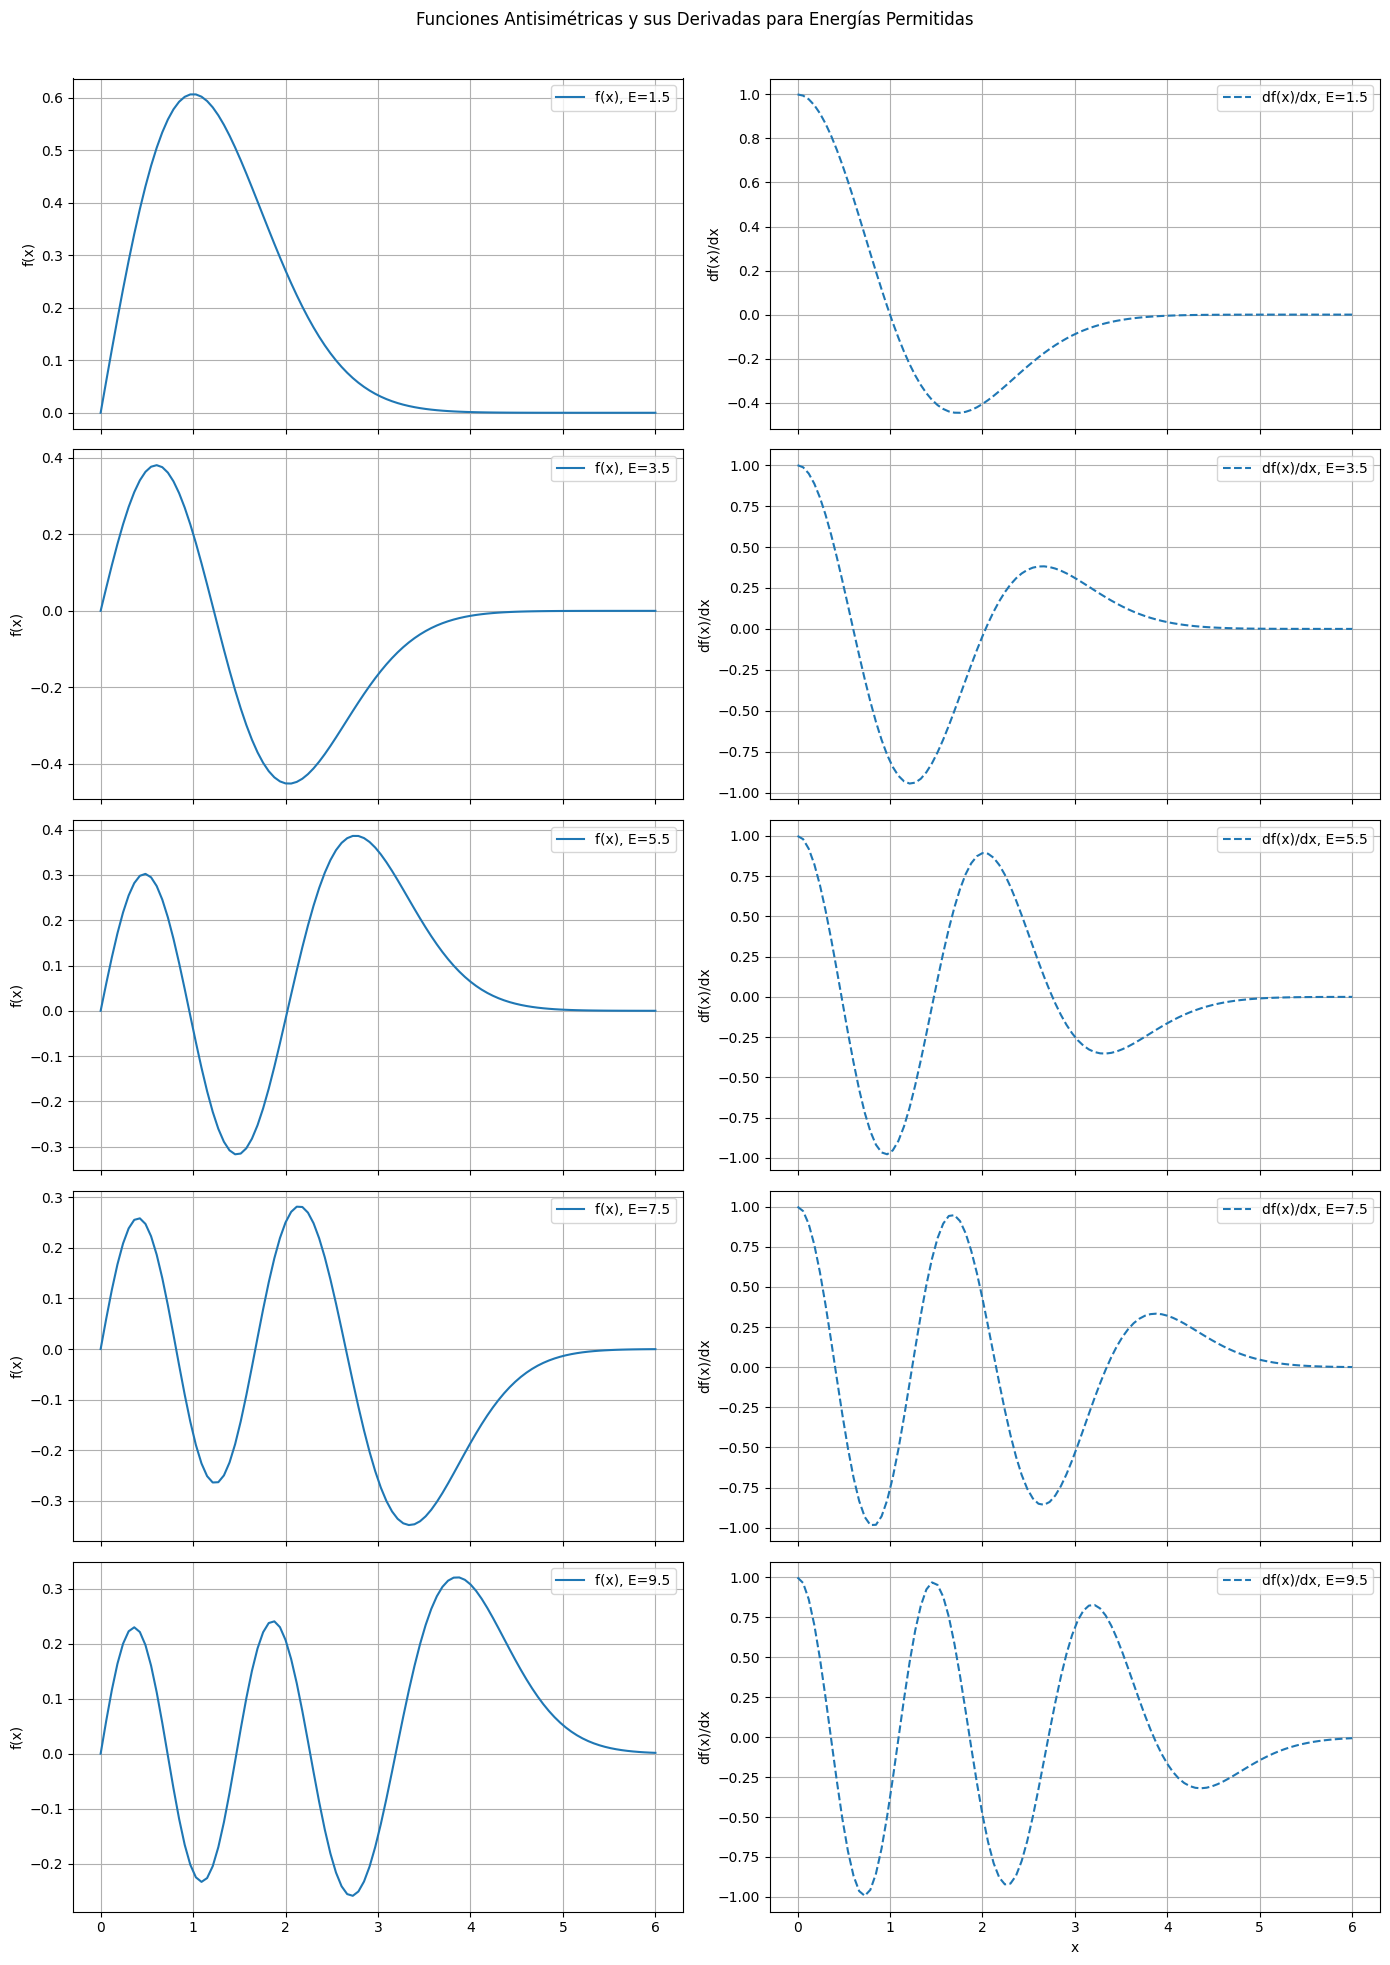

Verificación para funciones simétricas:
E=0.5 no diverge
E=2.5 no diverge
E=4.5 no diverge
E=6.5 no diverge
E=8.5 no diverge

Verificación para funciones antisimétricas:
E=1.5 no diverge
E=3.5 no diverge
E=5.5 no diverge
E=7.5 no diverge
E=9.5 no diverge


In [9]:
# Definir el sistema de ecuaciones diferenciales
def sistema(x, y, E):
    f1, f2 = y
    df1_dx = f2
    df2_dx = -2 * E * f1 +  f1 * x**2
    return [df1_dx, df2_dx]

# Resolver la ecuación de Schrödinger
def resolver_ecuacion(E, condiciones, x_span=(0, 6)):
    f1_0, f2_0 = condiciones
    # Resolver la ecuación diferencial con solve_ivp
    sol = solve_ivp(sistema, x_span, [f1_0, f2_0], args=(E,), dense_output=True,max_step=1e-2)

    # Crear un array de valores de x para graficar
    x_values = np.linspace(x_span[0], x_span[1], 100)
    y_values = sol.sol(x_values)

    return x_values, y_values

# Verificar si la solución diverge
def verificar_no_divergencia(E_values, condiciones, x_final=6, umbral=1):
    """Verificar si las soluciones divergen."""
    for E in E_values:
        x_vals, y_vals = resolver_ecuacion(E, condiciones)
        f_x_final = y_vals[0][-1]
        df_dx_final = y_vals[1][-1]
        if np.sqrt(f_x_final**2 + df_dx_final**2) > umbral:
            print(f"E={E} diverge")
        else:
            print(f"E={E} no diverge")

#from tqdm.notebook import tqdm
"""""
# Encontrar energías permitidas con barrido
def buscar_energias(condiciones, num_energies=5, umbral=1):
    allowed_energies = []
    E_guess = 0.1  # Valor inicial de la energía
    step_E = 0.01  # Paso de energía
    Posible_energies=np.arange(0,10,step_E)
    for E_guess in tqdm(Posible_energies):
        x_vals, y_vals = resolver_ecuacion(E_guess, condiciones)
        f_x_final = y_vals[0][-1]
        df_dx_final = y_vals[1][-1]
        if np.sqrt(f_x_final**2 + df_dx_final**2) < umbral:
            # Verificar que la nueva energía esté al menos a una distancia de 1 de las anteriores
            if all(np.abs(E_guess - E) > 1 for E in allowed_energies):
                allowed_energies.append(E_guess)
        E_guess += step_E

    return allowed_energies
"""""
# Encontrar energías permitidas con barrido
def buscar_energias(condiciones, num_energies=5, umbral=1):
    allowed_energies = []
    E_guess = 0.1  # Valor inicial de la energía
    step_E = 0.01  # Paso de energía
    Posible_energies=np.arange(0,10,step_E)
    for E_guess in Posible_energies:
        x_vals, y_vals = resolver_ecuacion(E_guess, condiciones)
        f_x_final = y_vals[0][-1]
        df_dx_final = y_vals[1][-1]
        if np.sqrt(f_x_final**2 + df_dx_final**2) < umbral:
            # Verificar que la nueva energía esté al menos a una distancia de 1 de las anteriores
            if all(np.abs(E_guess - E) > 1 for E in allowed_energies):
                allowed_energies.append(E_guess)
        E_guess += step_E

    return allowed_energies

# Condiciones iniciales para funciones simétricas y antisimétricas
condiciones_simetrica = (1, 0)
condiciones_antisimetrica = (0, 1)

# Encontrar energías permitidas para la forma simétrica
energies_simetricas = buscar_energias(condiciones_simetrica)
print("Energías permitidas (forma simétrica):", energies_simetricas)

# Encontrar energías permitidas para la forma antisimétrica
energies_antisimetricas = buscar_energias(condiciones_antisimetrica)
print("Energías permitidas (forma antisimétrica):", energies_antisimetricas)

# Graficar resultados para funciones simétricas
fig, axs = plt.subplots(len(energies_simetricas), 2, figsize=(14, 4 * len(energies_simetricas)), sharex='col')

for i, E in enumerate(energies_simetricas):
    x_vals_simetrica, y_vals_simetrica = resolver_ecuacion(E, condiciones_simetrica)

    # Graficar f(x) para la forma simétrica
    axs[i, 0].plot(x_vals_simetrica, y_vals_simetrica[0], label=f'f(x), E={E}')
    axs[i, 0].set_ylabel('f(x)')
    axs[i, 0].legend()
    axs[i, 0].grid()

    # Graficar df(x)/dx para la forma simétrica
    axs[i, 1].plot(x_vals_simetrica, y_vals_simetrica[1], linestyle='--', label=f"df(x)/dx, E={E}")
    axs[i, 1].set_ylabel("df(x)/dx")
    axs[i, 1].legend()
    axs[i, 1].grid()

plt.xlabel('x')
plt.suptitle('Funciones Simétricas y sus Derivadas para Energías Permitidas')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Graficar resultados para funciones antisimétricas
fig, axs = plt.subplots(len(energies_antisimetricas), 2, figsize=(14, 4 * len(energies_antisimetricas)), sharex='col')

for i, E in enumerate(energies_antisimetricas):
    x_vals_antisimetrica, y_vals_antisimetrica = resolver_ecuacion(E, condiciones_antisimetrica)

    # Graficar f(x) para la forma antisimétrica
    axs[i, 0].plot(x_vals_antisimetrica, y_vals_antisimetrica[0], label=f'f(x), E={E}')
    axs[i, 0].set_ylabel('f(x)')
    axs[i, 0].legend()
    axs[i, 0].grid()

    # Graficar df(x)/dx para la forma antisimétrica
    axs[i, 1].plot(x_vals_antisimetrica, y_vals_antisimetrica[1], linestyle='--', label=f"df(x)/dx, E={E}")
    axs[i, 1].set_ylabel("df(x)/dx")
    axs[i, 1].legend()
    axs[i, 1].grid()

plt.xlabel('x')
plt.suptitle('Funciones Antisimétricas y sus Derivadas para Energías Permitidas')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Verificación para divergencia
print("Verificación para funciones simétricas:")
verificar_no_divergencia(energies_simetricas, condiciones_simetrica)

print("\nVerificación para funciones antisimétricas:")
verificar_no_divergencia(energies_antisimetricas, condiciones_antisimetrica)
